In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Cars93_miss.csv')

In [4]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make,Yrows,Xcols
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra,1,1
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend,1,2
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90,1,3
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100,1,4
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i,1,5


In [5]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make', 'Yrows', 'Xcols'],
      dtype='object')

In [6]:
# dropping the unwanted columns from df

df.drop(['Manufacturer', 'Type',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin','Make'
       ],axis=1,inplace=True)

In [7]:
df.head()

,Model,Min.Price,Price,Max.Price,Yrows,Xcols
0,Integra,12.9,15.9,18.8,1,1
1,Legend,29.2,33.9,38.7,1,2
2,90,25.9,29.1,32.3,1,3
3,100,NaN,37.7,44.6,1,4
4,535i,NaN,30.0,NaN,1,5


In [10]:
# converting the columns series into array

model=(np.asarray(df['Model'])).reshape(5,18)
Min=(np.asarray(df['Min.Price'])).reshape(5,18)
Max=(np.asarray(df['Max.Price'])).reshape(5,18)
price=(np.asarray(df['Price'])).reshape(5,18)

print(model)
print(Min)
print(Max)
print(price)

[['Integra' 'Legend' '90' '100' '535i' 'Century' 'LeSabre' 'Roadmaster'
  'Riviera' 'DeVille' 'Seville' 'Cavalier' 'Corsica' 'Camaro' 'Lumina'
  'Lumina_APV' 'Astro' 'Caprice']
 ['Corvette' 'Concorde' 'LeBaron' 'Imperial' 'Colt' 'Shadow' 'Spirit'
  'Caravan' 'Dynasty' 'Stealth' 'Summit' 'Vision' 'Festiva' 'Escort'
  'Tempo' 'Mustang' 'Probe' 'Aerostar']
 ['Taurus' 'Crown_Victoria' 'Metro' 'Storm' 'Prelude' 'Civic' 'Accord'
  'Excel' 'Elantra' 'Scoupe' 'Sonata' 'Q45' 'ES300' 'SC300' 'Continental'
  'Town_Car' '323' 'Protege']
 ['626' 'MPV' 'RX-7' '190E' '300E' nan 'Cougar' 'Mirage' 'Diamante'
  'Sentra' 'Altima' 'Quest' 'Maxima' 'Achieva' 'Cutlass_Ciera'
  'Silhouette' 'Eighty-Eight' 'Laser']
 ['LeMans' 'Sunbird' 'Firebird' 'Grand_Prix' 'Bonneville' '900' 'SL'
  'Justy' 'Loyale' 'Legacy' 'Swift' 'Tercel' 'Celica' 'Camry' 'Previa'
  'Fox' 'Eurovan' 'Passat']]
[[12.9 29.2 25.9  nan  nan 14.2 19.9 22.6 26.3 33.  37.5  8.5 11.4 13.4
  13.4 14.7 14.7 18. ]
 [34.6 18.4 14.5 29.5  7.9  8.4 11.

In [11]:
# Creating Pivot table
result=df.pivot(index='Yrows',columns='Xcols',values='Price')
print(result)

Xcols    1     2     3     4     5     6     7     8     9     10
Yrows                                                            
1      15.9  33.9  29.1  37.7  30.0  15.7  20.8  23.7  26.3  34.7
2      40.1  13.4  11.4  15.1  15.9  16.3  16.6  18.8  38.0  18.4
3      15.8  29.5   9.2  11.3  13.3  19.0  15.6  25.8  12.2  19.3
4       7.4  10.1  11.3  15.9  14.0  19.9  20.2  20.9   8.4  12.5
5      19.8  12.1  17.5   8.0  10.0  10.0  13.9  47.9  28.0  35.2
6      34.3  36.1   8.3  11.6  16.5  19.1  32.5  31.9  61.9  14.1
7      14.9  10.3  26.1  11.8  15.7  19.1  21.5  13.5  16.3  19.5
8      20.7  14.4   9.0  11.1  17.7  18.5  24.4  28.7   NaN   8.4
9      10.9  19.5   8.6   9.8  18.4   NaN  22.7   9.1  19.7  20.0


In [47]:
labels=(np.array(["{0} \n {1} \n {2} \n {3}".format(model,Min,Max,price) 
                  for model,Min,Max,price in zip(model.flatten(),
                    Min.flatten(),
                    Max.flatten(),
                    price.flatten())])).reshape(9,10) 

In [48]:
labels

array([['Integra \n 12.9 \n 18.8 \n 15.9',
        'Legend \n 29.2 \n 38.7 \n 33.9', '90 \n 25.9 \n 32.3 \n 29.1',
        '100 \n nan \n 44.6 \n 37.7', '535i \n nan \n nan \n 30.0',
        'Century \n 14.2 \n 17.3 \n 15.7',
        'LeSabre \n 19.9 \n nan \n 20.8',
        'Roadmaster \n 22.6 \n 24.9 \n 23.7',
        'Riviera \n 26.3 \n 26.3 \n 26.3',
        'DeVille \n 33.0 \n 36.3 \n 34.7'],
       ['Seville \n 37.5 \n 42.7 \n 40.1',
        'Cavalier \n 8.5 \n 18.3 \n 13.4',
        'Corsica \n 11.4 \n 11.4 \n 11.4',
        'Camaro \n 13.4 \n 16.8 \n 15.1',
        'Lumina \n 13.4 \n 18.4 \n 15.9',
        'Lumina_APV \n 14.7 \n 18.0 \n 16.3',
        'Astro \n 14.7 \n 18.6 \n 16.6',
        'Caprice \n 18.0 \n 19.6 \n 18.8',
        'Corvette \n 34.6 \n 41.5 \n 38.0',
        'Concorde \n 18.4 \n 18.4 \n 18.4'],
       ['LeBaron \n 14.5 \n 17.1 \n 15.8',
        'Imperial \n 29.5 \n 29.5 \n 29.5', 'Colt \n 7.9 \n 10.6 \n 9.2',
        'Shadow \n 8.4 \n 14.2 \n 11.3',
        '

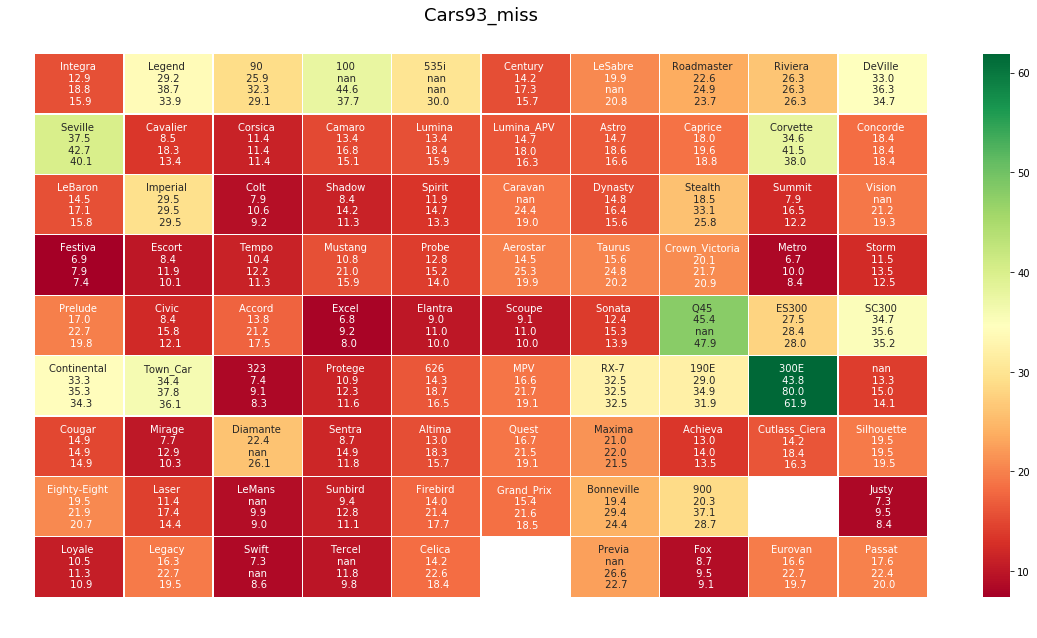

In [54]:
fig,ax=plt.subplots(figsize=(20,10))

#Add title to the heat map
title="Cars93_miss" 

#Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl=ax.title
ttl.set_position([0.5,1.05])

#Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

#Remove the axes
ax.axis('off')


#Use the heatmap function from the seaborn package
sn.heatmap(result,annot=labels,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax) #result is pivot value

#Display the Cars93_miss
plt.show()